Ensemble (앙상블)

머신러닝에서 학습의 결과가 noise, variance, bias 등으로 달라진다.

앙상블은 이중 variance, bias 등의 영향을 줄여준다

bias - 편향 ,  variance - 분산

Bagging 과 Boosting으로 크게 나뉘어짐

---------------------------------------------------------------------
Bagging (Bootstrap aggregating) 줄임말

*여러개의 bootstrap 자료를 생성하고 결합하여 최종예측모형 산출

Bootstrap 
 -> 단순 복원 임의 추출법(random sampling)으로 원자료로부터 크기가 동일한
     여러 개(중복가능)의 표본 추출

*예측모형의 변동성이 큰 경우 variance 감소 목적

*과대적합된 모형, bias 작고, 분산이 큰 모형에 적합!!

*랜덤 복원 샘플의 모델들로 부터 최종 결과는 average나 majority voote

* 여러개를 만들어서 합친다고 생각하면 됨

--------------------------------------------------------------------

Boosting

*잘못 분류된 개체들에 집중하여 새로운 분류 규칙 수립

*약한 모델을 결합하여 강한 예측 모형 수립

*앞단계의 모델에서 실수를 줄여간다 (순차적 생성)

*시간과 반복을 줄일 수 있음

*과적합을 방지하기 위해 중지 기준을 정해야 함.

* 하나를 계속해서 발전시켜나간다고 생각하면 됨

Random Forest

-과대적합을 피하기 위해 여러 결정트리를 결합(Ensemble)

-서로다른 방향으로 과대적합한 트리 결과를 평균하여 과대적합을 줄인다.

-트리가 달라지도록 트리 생성시 무작위성을 주입
->트리 생성할 때 무작위로 데이터 포인트 생성 : Bootstrap sample
->분할시 후보 특성을 무작위로 선택 : 중복선택 가능

ex) 한개의 데이터 셋으로 여러 개의 랜덤 데이터 셋을 만듦

original = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]

round1   = [2, 3, 3, 5, 5, 1, 2 ,8 , 6, 6]

round2   = [1, 6, 3, 2, 5, 5, 7 ,8 , 8, 10]

round3   = [2, 3, 10, 6, 3, 2, 4 ,5 , 7, 6]
이런식으로

In [8]:
#multi class -> a 아니면 나머지 , b 아니면 나머지  , (이진)
#(NB, KNN, DT, Logistic)

#mulitnomial -> a,b,c, 중 한가지를 선택'

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn

#한글을 출력하기 위한 import
#한글 font를 설정해준다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

#make_moons으로 샘플 100개의 데이터를 가져온다.
X, y = make_moons(n_samples = 100, noise = 0.25, random_state= 3)

#가져온 데이터를 훈련, 테스트 셋으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

#n_estimators = tree의 개수 
#forest 객체에 랜덤포레스트 모델을 생성한 뒤 훈련 데이터 학습시킨다.
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


#테스트 세트 정확도 출력
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

#cvscores(모델, 데이터값, 타겟값, cv값)
#cv= 5 일 떄 테스트 세트 정확도 출력
cvscores = cross_val_score(forest, X, y , cv =5 )
print("테스트 세트 정확도 CV=5: {:.3f}\n ".format(cvscores.mean()))

#cv=10일 때 테스트 세트 정확도 출력
cvscores = cross_val_score(forest, X, y, cv = 10)
print("테스트 세트 정확도 CV=10: {:.3f}\n ".format(cvscores.mean()))


테스트 세트 정확도: 0.920

테스트 세트 정확도 CV=5: 0.860
 
테스트 세트 정확도 CV=10: 0.840
 


In [13]:
#cancer에 가져온 cancer 데이터를 저장한다.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#cancer 데이터를 훈련, 테스트 셋으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=42)

#forest 객체에 랜덤포레스트 모델을 적용하고 트리의 개수는 100으로 한다.
forest = RandomForestClassifier(n_estimators = 100, random_state=0)

#forest 객체에 훈련 셋 넣어서 학습시킨다.
forest.fit(X_train, y_train)

#훈련세트, 테스트 세트의 정확도를 출력한다.
print("훈련 센트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
#훈련 세트 정확도가 1이 나왔는데 과대적합 의심해야함

print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
#테스트 세트 정확도도 높게 나와서 일반화를 시켜야함

#일반화를 시키기 위해 cv =10 으로 설정하고 다시 정확도를 출력해본다.
cvscores = cross_val_score(forest, X, y, cv = 10)
print("테스트 세트 정확도 CV =  10: {:.3f}\n".format(cvscores.mean()))

#cv=10번 했을때 각각의 정확도를 출력한다.
print(cvscores)


훈련 센트 정확도: 1.000
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV =  10: 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


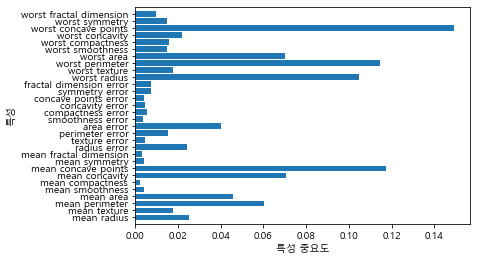

In [15]:

def plot_feature_importances_cancer(model):
    
    #cancer의 피처(30개)들을 n_feature에 저장한다.
    n_features = cancer.data.shape[1]
    
    # barh = 가로막대 그리는 함수
    # range()=  범위(개수 말하는듯?) , model.feature의 중요도, 간우데 맞춤
    plt.barh(range(n_features), model.feature_importances_, align='center')
    
    #yticks = y축 눈금값 설정 
    # arange() n_feature들의 개수, cancer의 피처이름들을 축에 적음
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    #x, y라벨의 이름 출력
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    
    #y축의 범위 1만큼의 길이에 n_features로 나눔
    plt.ylim(-1, n_features)
    
    
#각 트리에서 특성의 중요도 취합
#하나의 트리에서의 특성 중요도보다 신뢰가능 -> 결정트리는 하나의 트리만 봄
#결정트리랑 비교해봐도 대부분의 특성이 0보다 큼
plot_feature_importances_cancer(forest)

장점

-단일 트리의 장점 유지, 단점 보완

-회귀와 분류에서 가장 널리 사용되는 알고리즘

-뛰어난 성능, 매개변수 튜닝 부담 적음(기본값)

-데이터 스케일 불 필요

-큰 데이터셋 적용 가능, 여러 cpu코어에 병렬화 가능

  *n_jobs(사용할 코어수 지정): 기본값1 ~ 최대 -1

단점

-많은 트리가 생성되므로 자세한 분석이 어렵고 트리가 깊어지는 경향

-시각화를 위해서는 하나의 트리를 사용

-차원이 크고 희소한 데이터에 성능 안좋음 

ex) 텍스트 데이터 - 문장이 백만개 인데 중요한 특성은 10만개 나머지 중요도 = 0

-선형 모델보다 메모리 사용량이 많고 훈련과 예측이 느림



파라미터

n-estimators : 클수록 좋은 성능 , 과대적합을 줄여 안정적 모델 but 큰 메모리, 긴 훈련시간
    
max-features : 트리의 무작위성 지원, 과대적합 줄여줌
    
max-depth    : 사전 가지치기
    
    -> 훈련과 예측에 필요한 메모리와 시간 vs 성능향상 vs 과대적합 얼마나 막을 것